# PCA project | Country Data

In [1]:
# Warnings

import warnings
warnings.simplefilter(action='ignore')

# Import Libraries:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
sns.set 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [2]:
# Import Data

Data = pd.read_csv('D:\Scientific Topics\AI\IMT1.ir_Machine Learning\Data\Country-data_PCA.csv')

In [3]:
# Make a DataFrame od Data

df = pd.DataFrame(Data)
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [4]:
# Getting some information

df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5]:
df.describe().T[['mean']] # The T property is used to transpose index and columns.

mean
child_mort     38.270060
exports        41.108976
health          6.815689
imports        46.890215
income      17144.688623
inflation       7.781832
life_expec     70.555689
total_fer       2.947964
gdpp        12964.155689

In [6]:
# Is there any null data?

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# Drop the column 'country' for now

df1 = df.drop(['country'], axis = 1)

# Preprocessing

### Visualization

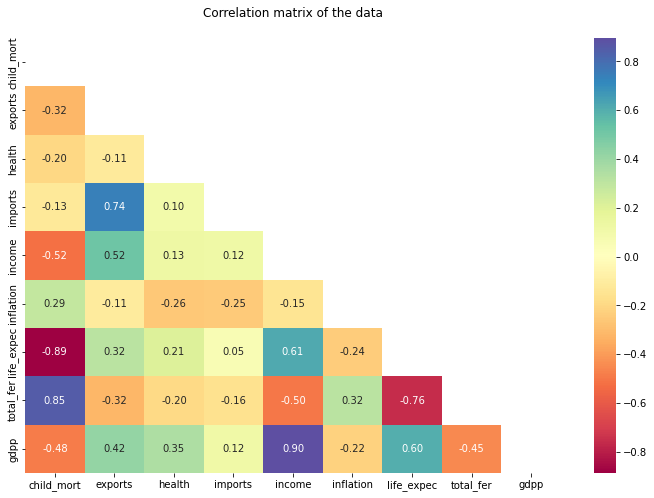

In [8]:
# Correlation Matrix

plt.figure(figsize = (12,8))
mask = np.triu(df1.corr()) # np.ones_like(df1.corr()) # u means upper
hm = sns.heatmap(df1.corr(), cmap= 'Spectral',annot = True , fmt='.2f', mask=mask )
hm.set(title = "Correlation matrix of the data\n")
plt.show()

#### According to above heatmap:

###### Income ↑  , gdpp ↑   ----->   Child-mort ↓
###### Child-mort ↑             ----->   Life-exp ↓
###### Total-fer ↑                 ----->   Child-mort ↑ 
###### Export ↑                    ----->   Income ↑
###### Income ↑                   ----->   Life-exp ↑
###### Income ↑                   ----->   Total-fer ↓
###### Life-exp ↑                  ----->   Total-fer ↓
###### Life-exp ↑                  ----->   GDPP ↑

In [9]:
# Show the name of columns

col = df1.columns
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
sns.set_theme()

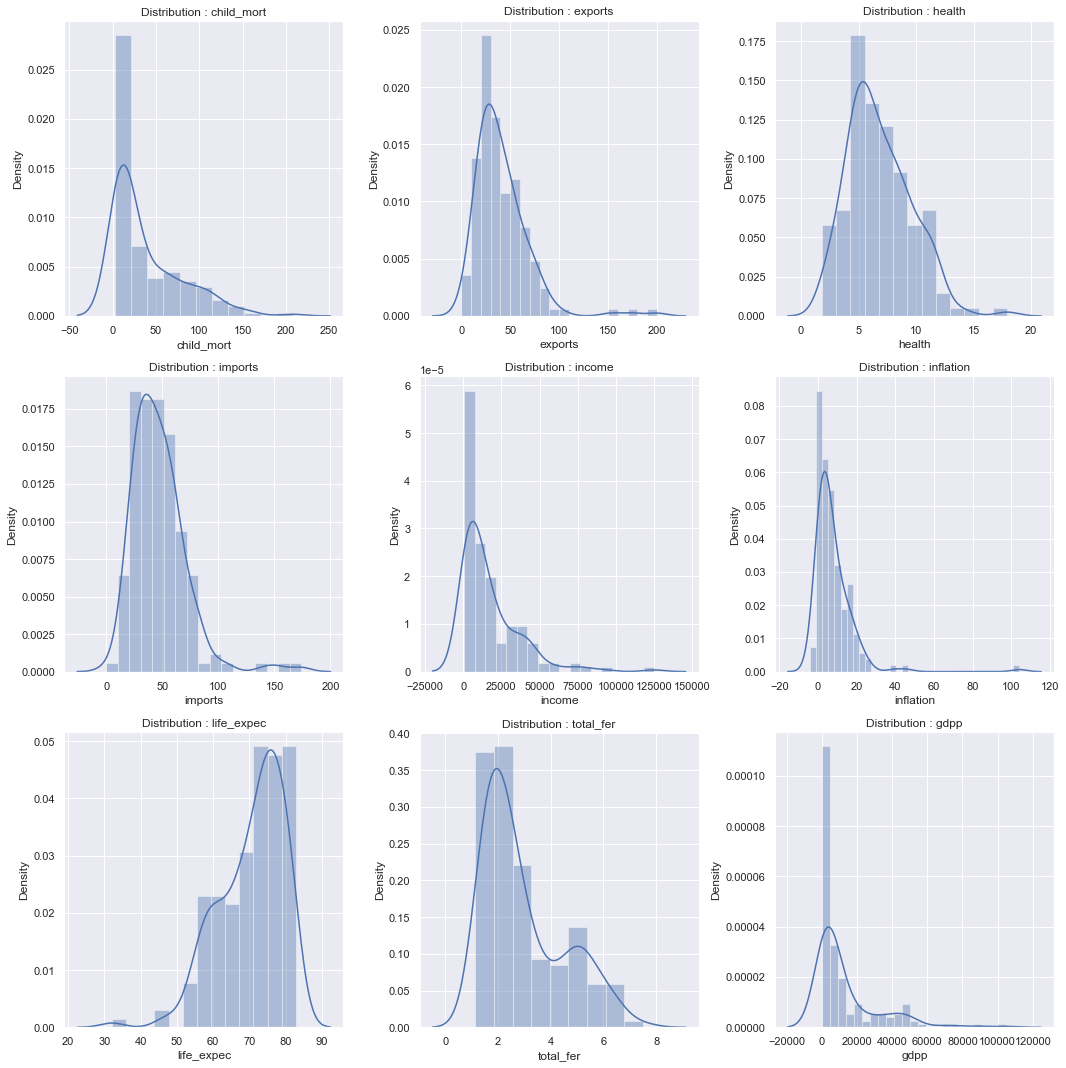

In [11]:
# To know the distribution of each column

fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(0, 9):  # Number of the numerical features = 9
    plt.subplot(3,3,i+1)
    sns.distplot(df1[col[i]], kde=True)
    title = 'Distribution : ' + col[i]
    plt.title(title)
plt.tight_layout()  # (pad = 4)
plt.show()

###### - Health data follows a normal distribution.

###### - Life-exp is skewed to the left.

###### - The rest are skewed to the right. (positive skewness)

#### Draw five data from the first, middle and last sorted data for each column.

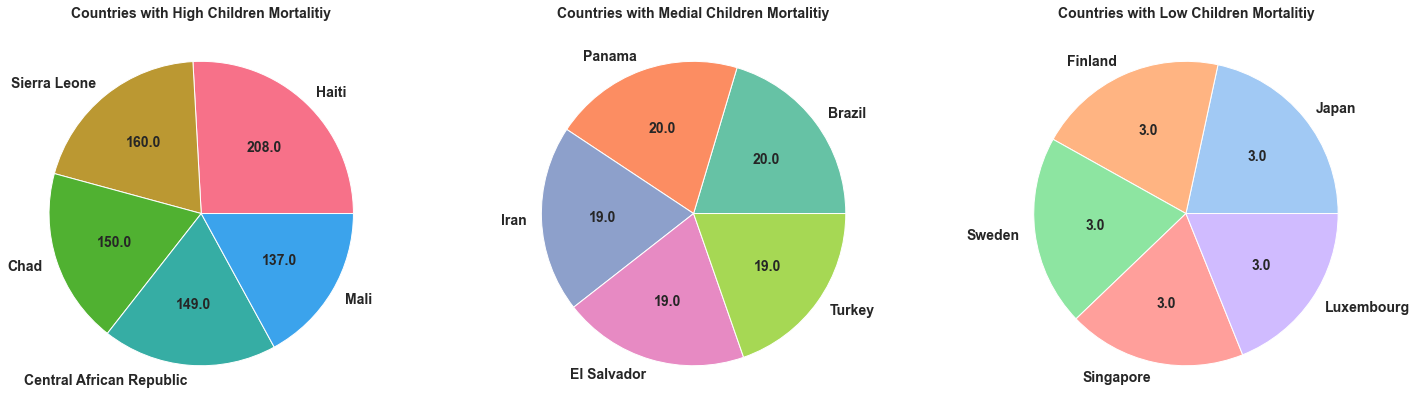

In [12]:
############################################ Child_Mort ############################################################

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'child_mort').iloc[:5]
palette_color = sns.color_palette('husl') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['child_mort'].sum(), 0)
    return a
plt.title('Countries with High Children Mortalitiy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['child_mort'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'child_mort').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['child_mort'].sum(), 0)
    return a
plt.title('Countries with Medial Children Mortalitiy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['child_mort'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'child_mort').iloc[161:166]
palette_color = sns.color_palette('pastel') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['child_mort'].sum(), 0)
    return a
plt.title('Countries with Low Children Mortalitiy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['child_mort'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent

plt.show()    

##### Haiti, located in Central America, has the highest number of child mortality. Most African countries are also seen in these statistics. 
##### On the other hand, European countries and some Asian countries have the lowest child mortality rate.


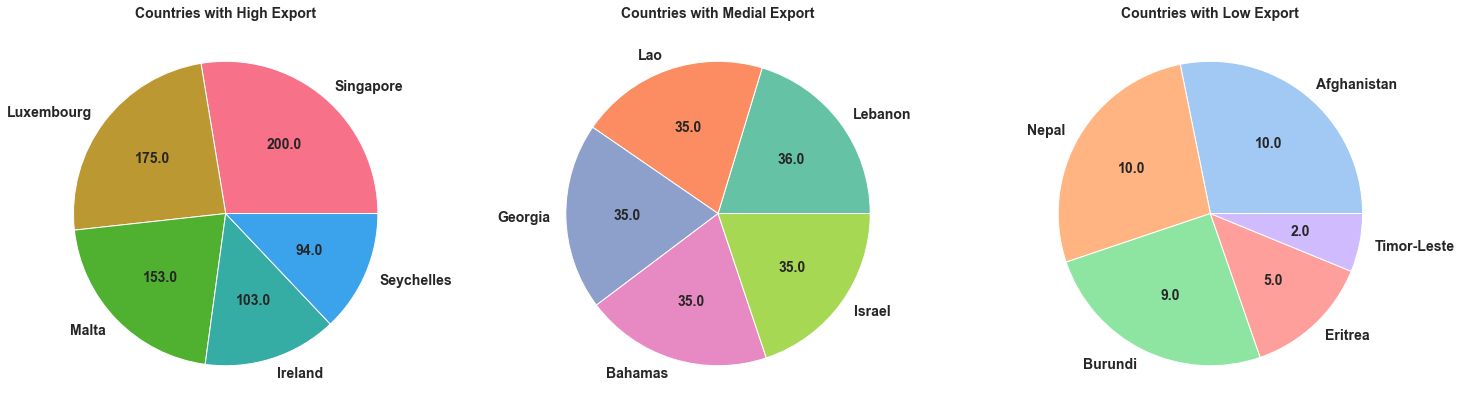

In [13]:
############################################ Exports ############################################################

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'exports').iloc[:5]
palette_color = sns.color_palette('husl') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['exports'].sum(), 0)
    return a
plt.title('Countries with High Export', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['exports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'exports').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['exports'].sum(), 0)
    return a
plt.title('Countries with Medial Export', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['exports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'exports').iloc[161:166]
palette_color = sns.color_palette('pastel') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['exports'].sum(), 0)
    return a
plt.title('Countries with Low Export', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['exports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent

plt.show()  

##### Singapore accounts for the largest number of exports. European countries also have the highest amount.
##### Afghanistan and Nepal have low exports. Most African countries are also in this category.

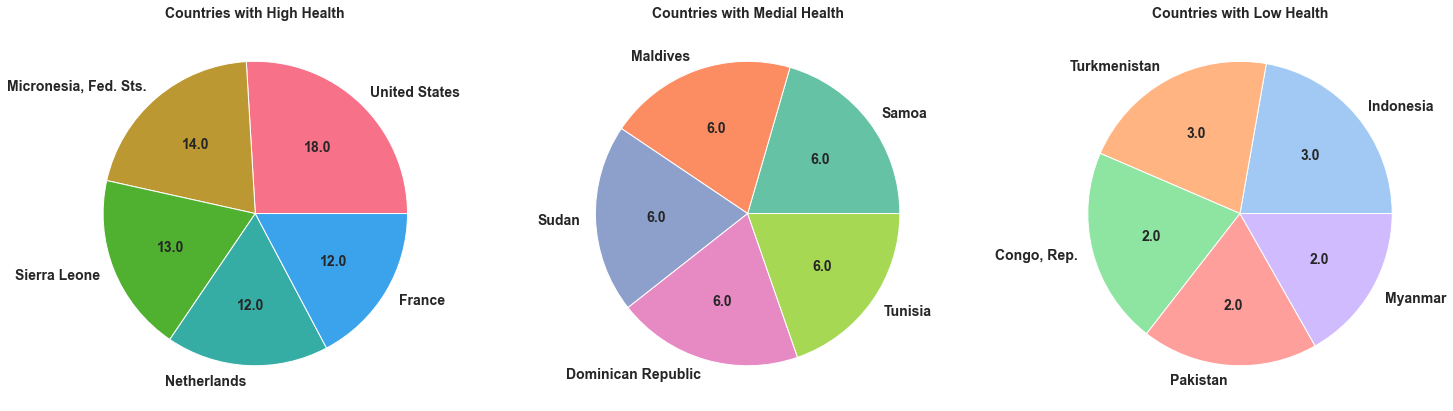

In [14]:
############################################ Health ############################################################

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'health').iloc[:5]
palette_color = sns.color_palette('husl') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['health'].sum(), 0)
    return a
plt.title('Countries with High Health', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['health'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'health').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['health'].sum(), 0)
    return a
plt.title('Countries with Medial Health', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['health'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'health').iloc[161:166]
palette_color = sns.color_palette('pastel') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['health'].sum(), 0)
    return a
plt.title('Countries with Low Health', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['health'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent

plt.show() 

##### The USA is the country that spends the most on health.
##### Countries that pay less attention to health issues are located in the Asian continent.

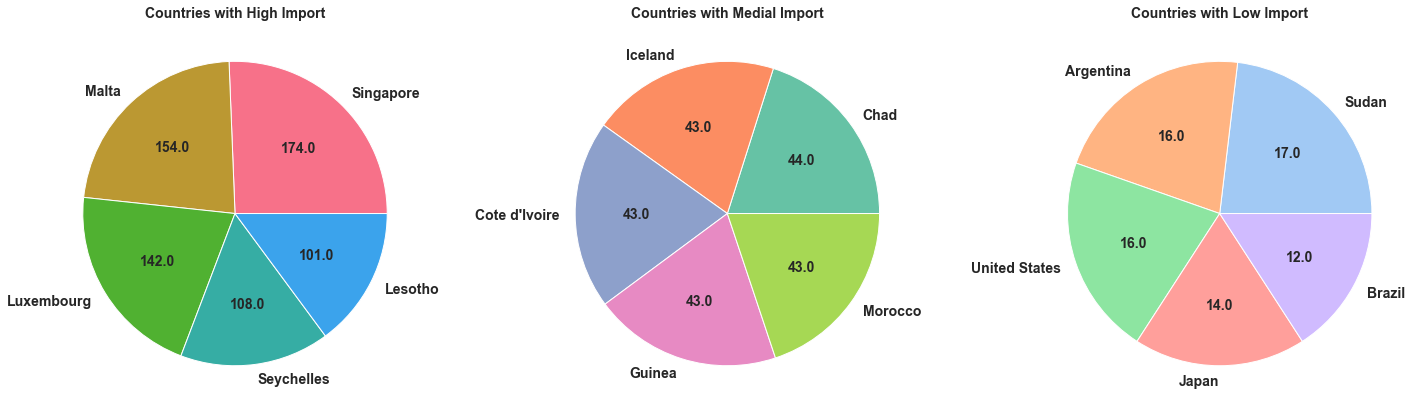

In [15]:
############################################ Imports ############################################################

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'imports').iloc[:5]
palette_color = sns.color_palette('husl') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['imports'].sum(), 0)
    return a
plt.title('Countries with High Import', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['imports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'imports').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['imports'].sum(), 0)
    return a
plt.title('Countries with Medial Import', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['imports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'imports').iloc[161:166]
palette_color = sns.color_palette('pastel') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['imports'].sum(), 0)
    return a
plt.title('Countries with Low Import', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['imports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent

plt.show() 

##### Singapore, Malta, Luxembourg, and Seychelles are on the list of countries that import the most. These countries also had the largest exports.
##### Brazil is the least importer among the countries. Sudan, Argentina, USA, and Japan are among the countries that have low imports.


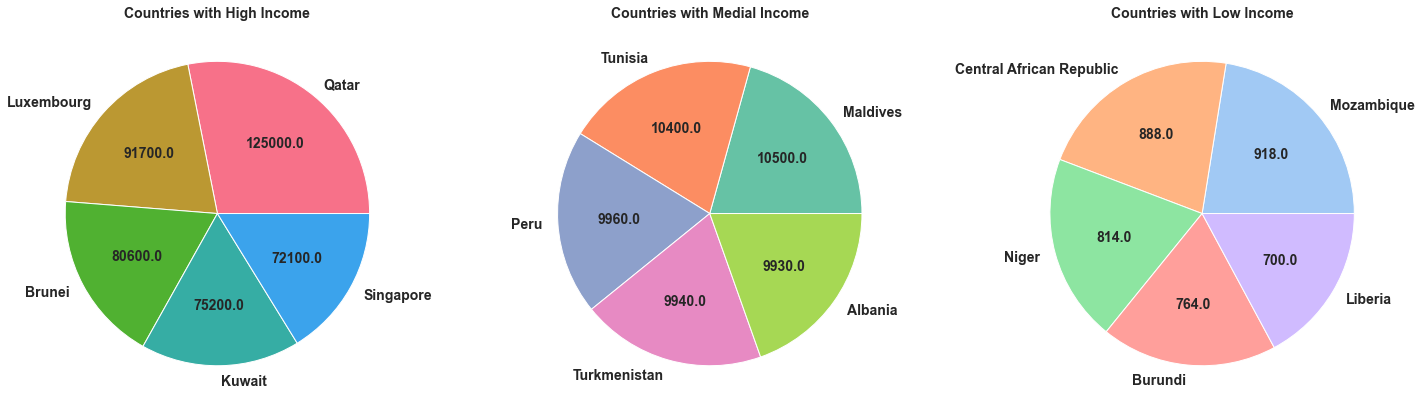

In [16]:
############################################ Income ############################################################

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'income').iloc[:5]
palette_color = sns.color_palette('husl') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['income'].sum(), 0)
    return a
plt.title('Countries with High Income', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['income'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'income').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['income'].sum(), 0)
    return a
plt.title('Countries with Medial Income', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['income'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'income').iloc[161:166]
palette_color = sns.color_palette('pastel') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['income'].sum(), 0)
    return a
plt.title('Countries with Low Income', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['income'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent

plt.show() 

##### Qatar has the highest per capita income. The countries of Luxembourg and Singapore are again seen in the top five countries. In general, South Asian countries are unique in this matter.
##### African countries are again in the last five lists and their annual income is less.

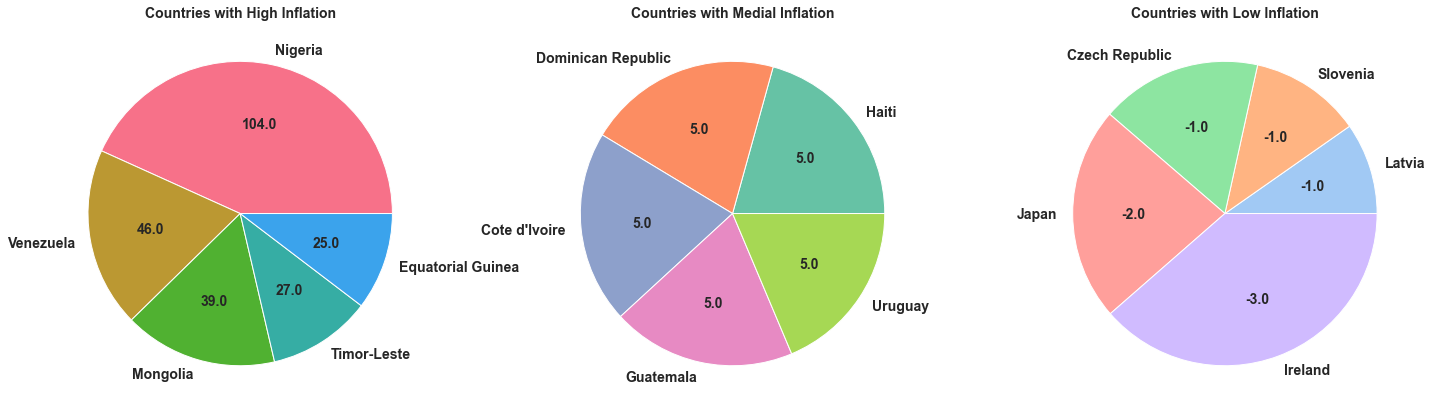

In [17]:
############################################ Inflation ############################################################

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'inflation').iloc[:5]
palette_color = sns.color_palette('husl') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['inflation'].sum(), 0)
    return a
plt.title('Countries with High Inflation', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['inflation'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'inflation').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['inflation'].sum(), 0)
    return a
plt.title('Countries with Medial Inflation', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['inflation'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'inflation').iloc[161:166]
palette_color = sns.color_palette('pastel') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['inflation'].sum(), 0)
    return a
plt.title('Countries with Low Inflation', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = abs(data['inflation']), labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent

plt.show()

##### Nigeria has by far the highest inflation statistics.
##### Some countries have negative inflation.
##### Inflation reduces the actual value of money over time. Conversely, negative inflation increases the actual value of money (the national currency of a country or a regional economy). It means that a person can buy more goods over time with a fixed amount of money. In general, economists consider negative inflation as a problem in the modern economy. Because increasing the actual value of the debt may exacerbate the recession and lead to a spiral of negative inflation.

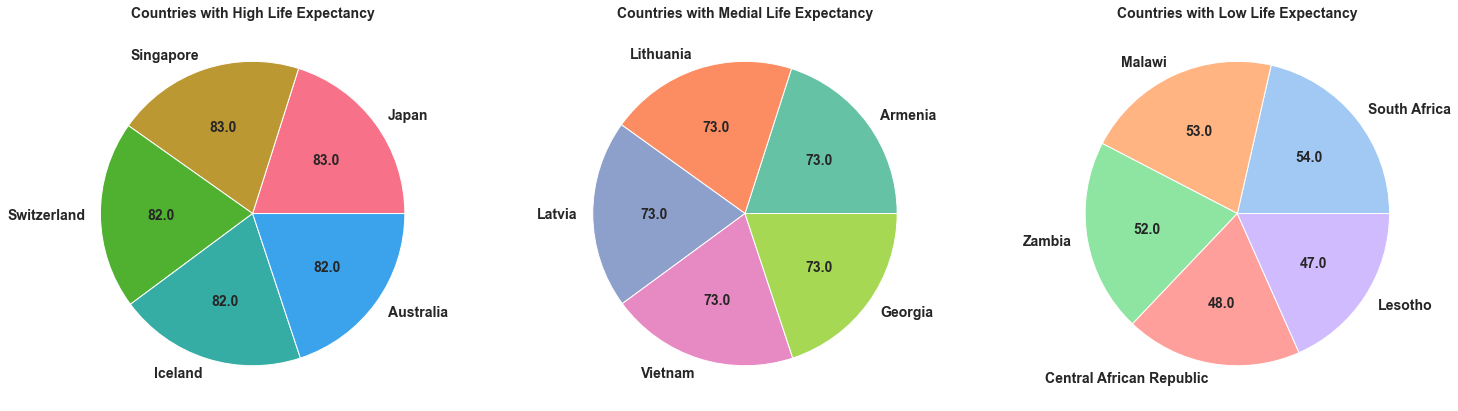

In [18]:
############################################ Life Expectancy ############################################################

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'life_expec').iloc[:5]
palette_color = sns.color_palette('husl') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['life_expec'].sum(), 0)
    return a
plt.title('Countries with High Life Expectancy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['life_expec'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'life_expec').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['life_expec'].sum(), 0)
    return a
plt.title('Countries with Medial Life Expectancy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['life_expec'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'life_expec').iloc[161:166]
palette_color = sns.color_palette('pastel') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['life_expec'].sum(), 0)
    return a
plt.title('Countries with Low Life Expectancy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['life_expec'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent

plt.show()

##### African countries have the lowest life expectancy and are again in the last five countries.

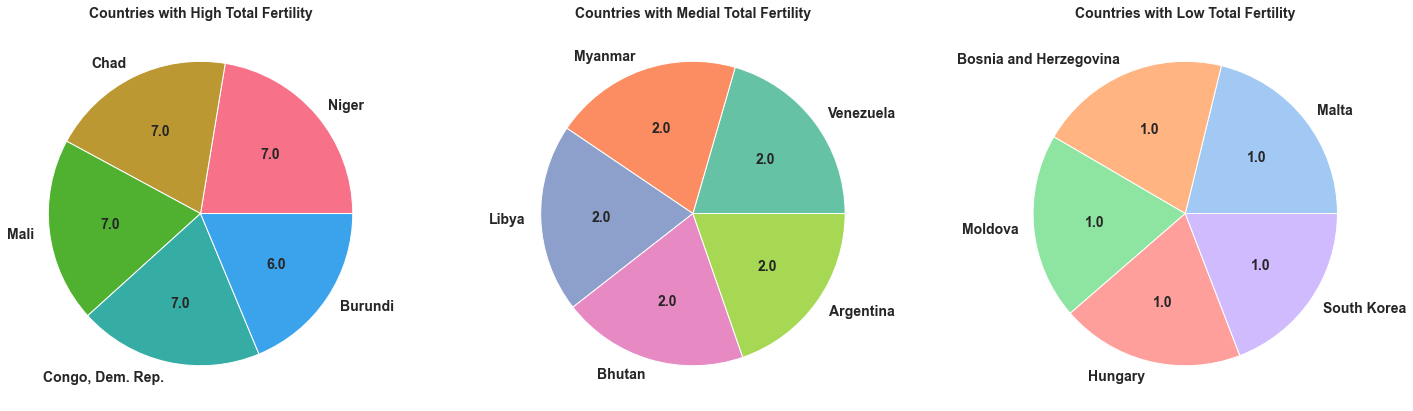

In [19]:
############################################ Total Fertility ############################################################

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'total_fer').iloc[:5]
palette_color = sns.color_palette('husl') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['total_fer'].sum(), 0)
    return a
plt.title('Countries with High Total Fertility', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['total_fer'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'total_fer').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['total_fer'].sum(), 0)
    return a
plt.title('Countries with Medial Total Fertility', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['total_fer'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'total_fer').iloc[161:166]
palette_color = sns.color_palette('pastel') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['total_fer'].sum(), 0)
    return a
plt.title('Countries with Low Total Fertility', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['total_fer'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent

plt.show()

##### African countries have the highest fertility rates (above 6). The average fertility is 2 and the lowest fertility is 1.

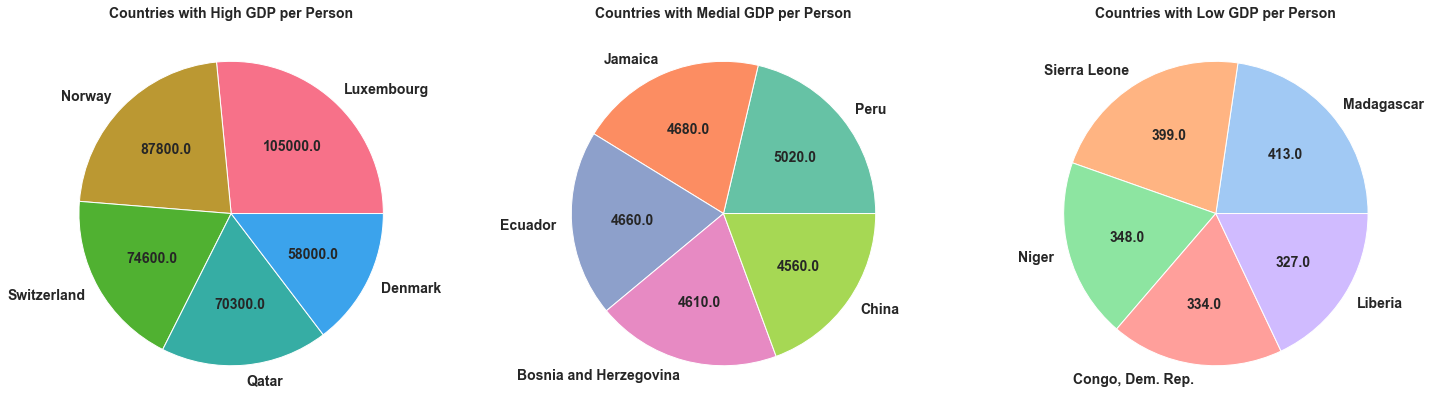

In [20]:
############################################ GDPp ############################################################

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'gdpp').iloc[:5]
palette_color = sns.color_palette('husl') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['gdpp'].sum(), 0)
    return a
plt.title('Countries with High GDP per Person', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['gdpp'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'gdpp').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['gdpp'].sum(), 0)
    return a
plt.title('Countries with Medial GDP per Person', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['gdpp'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent


plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'gdpp').iloc[161:166]
palette_color = sns.color_palette('pastel') # define Seaborn color palette to use
def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['gdpp'].sum(), 0)
    return a
plt.title('Countries with Low GDP per Person', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['gdpp'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) # , autopct='%.0f%%' --> to show percent

plt.show()

##### European countries have the highest GDP. Luxembourg is again among the top five countries and has the highest GDP. On the other hand, again African countries are on the list of the last five countries.

#### Conclusion:
##### In general, most African countries have lower incomes and GDP and import more, which shows that they are dependent on other countries. Inflation is high in these countries. The fertility rate is high and the child mortality rate is high. That's why the life expectancy in these countries is also lower.

### Analysis by the most repeated countries in the above graphs:

##### Sierra Leone: Although the country ranks third in spending on health, it ranks second in child mortality. It is also one of the five countries that have a lower GDP.

##### Chad: This country has both high child mortality and higher fertility.

##### Central African Republic ranks fourth in child mortality and has less income. Life expectancy in this country is very low.

##### Mali: Like Chad, it has both a high mortality rate and a high fertility rate.

##### Japan: It is one of the countries where child mortality is very low, however, in the health field, it is not among the five countries that care about health. Japan has negative inflation and fewer imports.

##### Singapour: This country is seen in most statistics. Singapore has low child mortality, ranks first in both exports and imports, has a high income, and has a high life expectancy. Like Japan, although child mortality is low, it is not among the top five countries in terms of health.

##### Luxemburg: This country, like Singapore, is more visible in these statistics and analyses. The lowest child mortality belongs to this country (of course, it is a small country with a smaller population). More exports and imports, more income, and life expectancy in this country are more than in all other countries.

##### Burundi: Among the five countries that have the least exports. Lower-income and higher fertility are seen in this country.

##### The USA: The country that gives the most importance to health, but it is not among the five countries with the lowest mortality.

##### Congo, Rep.: Less is spent on health, lower GDP, and higher fertility.

##### Niger: High income, high fertility, and low GDP

### Noise and Outliers

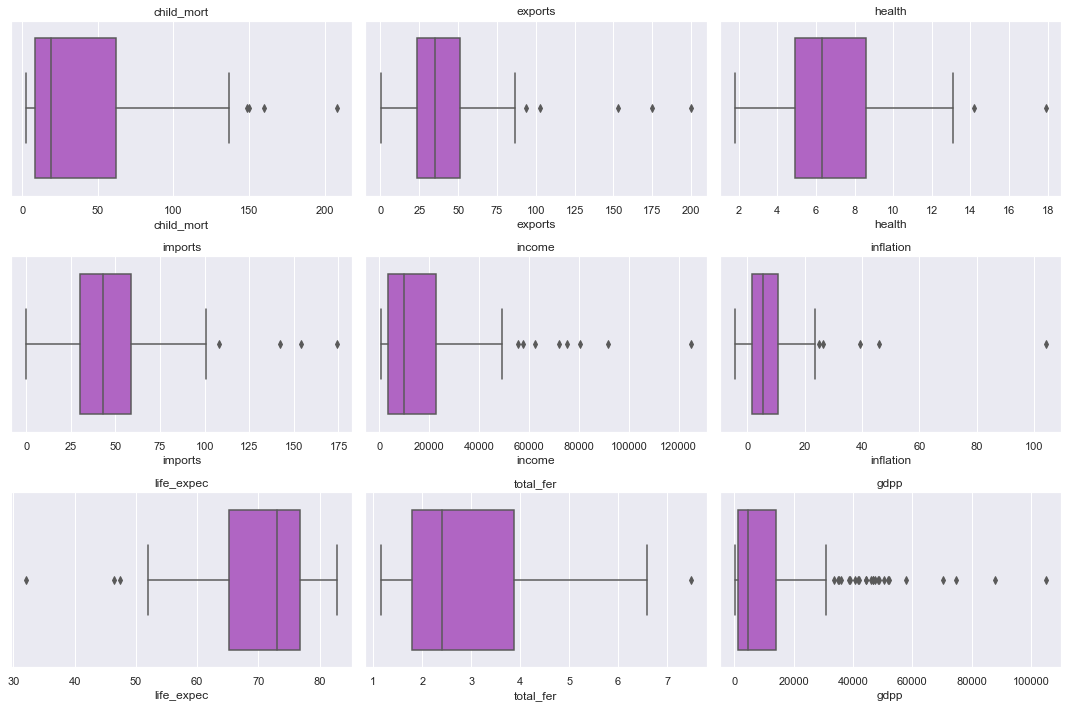

In [21]:
# Boxplot of dataset

fig= plt.subplots(nrows=3 , ncols=3 , figsize=(15, 10))
for i in range (len(df1.columns)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(df1[df1.columns[i]], color = '#BA55D3')
    plt.title(df1.columns[i])
    plt.tight_layout()

##### Data don't have outliers or noise. All numbers are possible in the real world!

# Modelling

In [22]:
# Dropping the 'country' column

df_nu = df.drop('country', axis = 1)

In [23]:
# Copy the df

df_new = df_nu.copy(deep = True)

In [24]:
# Standardaization and normalization

standard = StandardScaler()
minmax = MinMaxScaler()

In [25]:
# 'health' column was normal so just standardize it:

df_new['health'] = standard.fit_transform(df_new[['health']]) 

In [26]:
# Other columns should be normalized before modeling:

col_without_health = df_nu.drop('health', axis = 1)

for i in col_without_health.columns:
    df_new[i] = minmax.fit_transform(df_new[[i]])    

In [27]:
df_new.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.279088  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531 -0.097016  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559 -0.966073  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125 -1.448071  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079 -0.286894  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  
0   0.736593  0.003073  
1   0.078864  0.036833  
2   0.274448  0.040365  
3   0.790221  0.031488  
4   0.154574  0.114242

# PCA

In [28]:
pca = PCA()
pca.fit(df_new)

PCA()

In [29]:
# The attribute shows how much variance is explained by each of the nine individual components

pca.explained_variance_ratio_

array([0.82400771, 0.10602075, 0.02794208, 0.02170418, 0.00793512,
       0.00650681, 0.00248687, 0.00194359, 0.00145289])

Text(0, 0.5, 'Cumulative Explained Varience')

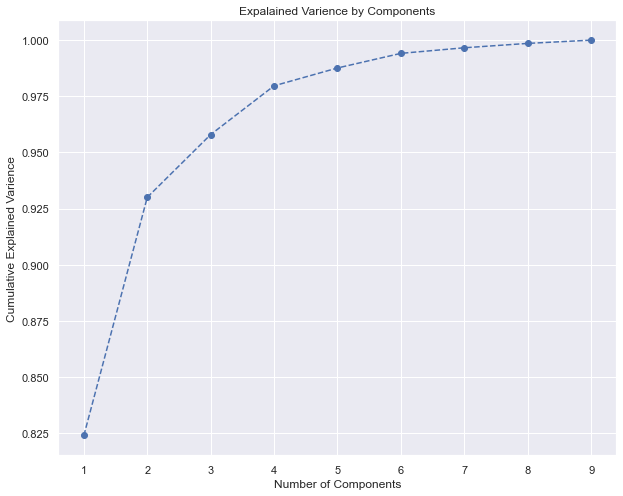

In [30]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Expalained Varience by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Varience")

In [31]:
# 2 components is chosen according to previous graph

pca = PCA(n_components = 2)

In [32]:
# Fitting the model to data with the selected components

pca.fit(df_new)

PCA(n_components=2)

In [33]:
scores_pca = pca.transform(df_new)

In [34]:
# Fitting k-means using the transformed data from the PCA

inertia = []

for i in range (1, 16):
    kmeans = KMeans(n_clusters = i, max_iter = 500,  init = 'random', random_state = 42)
    kmeans.fit(scores_pca)
    inertia.append(kmeans.inertia_)

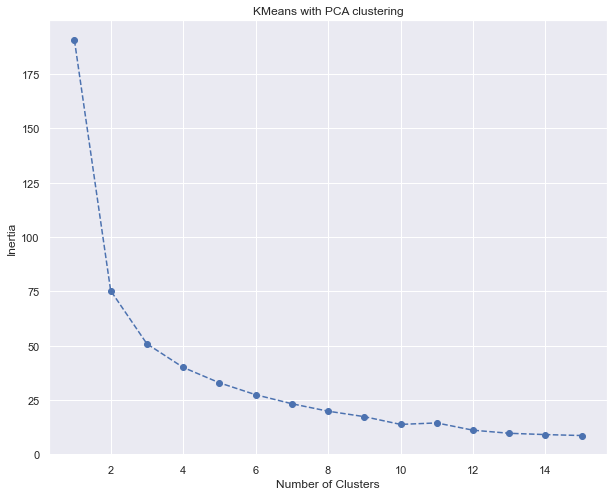

In [35]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 16), inertia, marker = 'o', linestyle = '--')
plt.title("KMeans with PCA clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [36]:
k1 = KneeLocator(range(1, 16), inertia, curve = 'convex', direction = 'decreasing') 
k1.elbow

3

In [37]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, max_iter = 500,  init = 'random', random_state = 42)
    kmeans.fit(scores_pca)
    score = silhouette_score(scores_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

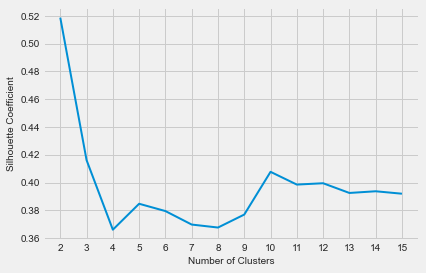

In [38]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 16), silhouette_coefficients, linewidth=2)
plt.xticks(range(2, 16), fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Number of Clusters", fontsize = 10)
plt.ylabel("Silhouette Coefficient", fontsize = 10)
plt.show()

### Implementation

In [39]:
kmeans_pca = KMeans(n_clusters=3, max_iter = 500,  init = 'random', random_state = 42)

In [40]:
# Fitting the data with the k-means PCA model

kmeans_pca.fit(scores_pca)

KMeans(init='random', max_iter=500, n_clusters=3, random_state=42)

In [41]:
# Creating a new datafarme with the original features and add the pca scores and assigned clusters

df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)

df_segm_pca_kmeans.columns.values[-2:] = ['Component 1', 'Component 2'] # , 'Component 3', ...

# The last column contains the pca k-means clustering labels
df_segm_pca_kmeans['Segment k-means PCA'] = kmeans_pca.labels_

In [42]:
df_segm_pca_kmeans.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Component 1  Component 2  \
0       9.44        56.2       5.82    553     0.220482     0.640048   
1       4.49        76.3       1.65   4090    -0.080903    -0.172000   
2      16.10        76.5       2.89   4460    -0.961283    -0.125199   
3      22.40        60.1       6.16   3530    -1.505914     0.472144   
4       1.44        76.8       2.13  12200    -0.264724    -0.237308   

   Segment k-means PCA  
0                    1  
1                    1  
2                    2  
3                    2  
4                    1

In [43]:
# Create a new column named ‘Segment’ and map the three clusters directly inside it

df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment k-means PCA'].map({0: 'First', 1: 'Second',
                                                                               2: 'Third'}) #, 2: 'Third'

#### The point of PCA was to determine the most important components. This way, we can be absolutely sure that the first two components explain more variance than the third one.

# Visualize Clusters by Components

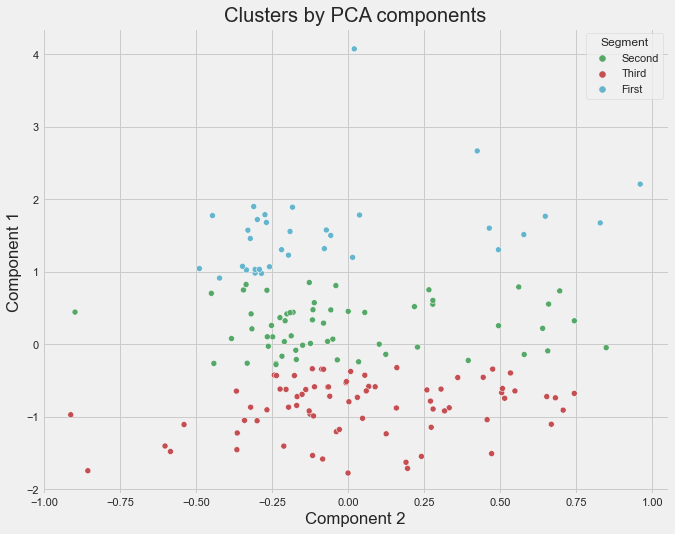

In [44]:
# Plot data by pca components
sns.set

x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA components')
plt.show()

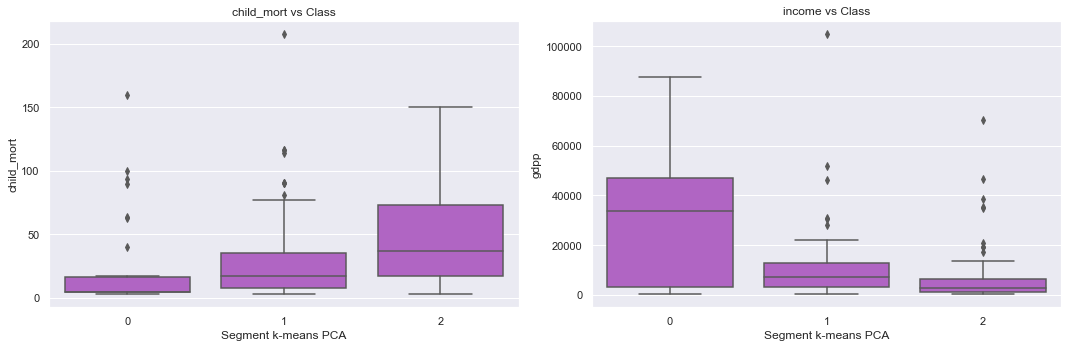

In [45]:
sns.set()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Segment k-means PCA', y = 'child_mort', data  = df_segm_pca_kmeans, color = '#BA55D3');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Segment k-means PCA', y = 'gdpp', data  = df_segm_pca_kmeans, color = '#BA55D3');
plt.title('income vs Class')

plt.tight_layout()
plt.show()

### It is obvious that as the income increas the child mort decrese which is confirmed by heatmap.

# Conclusion

In [46]:
df_segm_pca_kmeans.insert(0,column = 'Country', value = df['country'])

df_segm_pca_kmeans['Segment k-means PCA'].loc[df_segm_pca_kmeans['Segment k-means PCA'] == 0] = 'No Help Needed'
df_segm_pca_kmeans['Segment k-means PCA'].loc[df_segm_pca_kmeans['Segment k-means PCA'] == 1] = 'Might Need Help'
df_segm_pca_kmeans['Segment k-means PCA'].loc[df_segm_pca_kmeans['Segment k-means PCA'] == 2] = 'Help Needed'

fig = px.choropleth(df_segm_pca_kmeans[['Country','Segment k-means PCA']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df_segm_pca_kmeans['Segment k-means PCA'],  
                    color_discrete_map = {'No Help Needed': 'Blue',
                                          'Might Need Help':'Purple',
                                          'Help Needed':'Orange'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)
fig.show(engine = 'kaleido')